##Classification Decision Tree using the CART Algorithm

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing the data
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


#Data Preprocessing:

In [ ]:
df['quality'] = np.where(df['quality'] >= 7, 'Good', 'Not Good')

from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#CART Algorithm Implementation:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8820960698689956

Classification Report:
               precision    recall  f1-score   support

        Good       0.57      0.14      0.23        28
    Not Good       0.89      0.99      0.94       201

    accuracy                           0.88       229
   macro avg       0.73      0.56      0.58       229
weighted avg       0.85      0.88      0.85       229



#Model Training and Evaluation:


Confusion Matrix:
 [[  4  24]
 [  3 198]]


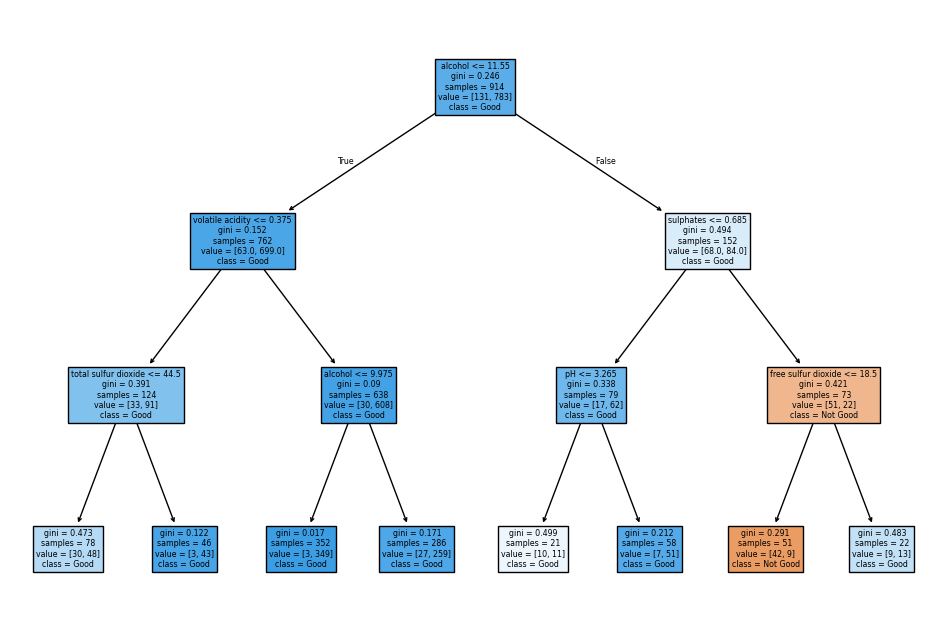

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Not Good', 'Good'], filled=True)
plt.show()

#Conclusion:



*   Based on the evaluation metrics (accuracy, classification report, confusion matrix), the decision tree model performs reasonably well in classifying wine quality as 'Good' or 'Not Good'.
*   The accuracy indicates the percentage of correctly classified instances. The classification report provides a detailed view of precision, recall, and F1-score for each class, allowing for a more in-depth analysis of the model's performance on each class.
*   The confusion matrix shows the number of true positive, true negative, false positive, and false negative predictions, providing insights into the types of errors made by the model.
*   The visualization of the decision tree reveals the structure and rules learned by the model, showing how it makes decisions based on the features (e.g., fixed acidity, volatile acidity, citric acid).
*   By examining the tree structure, you can understand which features are most important for predicting wine quality and how the model separates the 'Good' and 'Not Good' classes.
*   Further improvements to the model could include exploring different hyperparameter values (e.g., max_depth, criterion), feature engineering techniques, or employing ensemble methods for better performance.